In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metab = pd.read_csv('../data/Metabolome/data_infant_stool.csv')
metab['SampleID'] = '14834.'+metab['SampleID'].astype(str)
metab.set_index('SampleID', inplace=True)
metab.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/Metabolome/data_infant_stool.csv'

In [ ]:
metab.T.to_csv('../data/Metabolome/data_infant_stool_reformat.tsv', sep='\t')

In [7]:
!biom convert -i ../data/Metabolome/data_infant_stool_reformat.tsv -o ../data/Metabolome/data_infant_stool_reformat.biom --to-hdf5

In [8]:
!qiime tools import \
    --input-path ../data/Metabolome/data_infant_stool_reformat.biom \
    --input-format BIOMV210Format \
    --type 'FeatureTable[Frequency]' \
    --output-path ../data/Metabolome/data_infant_stool.qza

Imported ../data/Metabolome/data_stool_reformat.biom as BIOMV210Format to ../data/Metabolome/data_stool.qza


In [3]:
!qiime diversity beta \
    --i-table ../data/Metabolome/data_infant_stool.qza \
    --p-metric 'braycurtis' \
    --o-distance-matrix ../data/Metabolome/if_metab_braycurtis_dm.qza

Saved DistanceMatrix to: ../data/Metabolome/if_metab_braycurtis_dm.qza


In [7]:
!qiime diversity adonis \
    --i-distance-matrix ../data/Metabolome/if_metab_braycurtis_dm.qza \
    --m-metadata-file ../data/infant_feces_metadata.txt \
    --p-formula "host_age_infant+mode_delivery+host_subject_id+host_sex+hmo_Secretor_str+drink_water_safe_simplified+fp_long_bin+im_ever_abxs_adhoc+gestational_age_birth+AssetIndex2+birthweight+maternal_antibiotics" \
    --o-visualization ../data/Metabolome/allmetab_braycurtis_adonis.qzv

Saved Visualization to: ../data/Metabolome/allmetab_braycurtis_adonis.qzv


# 30 day Timepoint

In [9]:
!qiime feature-table filter-samples \
    --i-table ../data/Metabolome/data_infant_stool.qza \
    --m-metadata-file ../data/metadata_combined.txt \
    --p-where "[host_age_infant_cat]='30'" \
    --o-filtered-table ../data/Metabolome/metab_ftable_30daytp.qza

Saved FeatureTable[Frequency] to: ../data/Metabolome/metab_ftable_30daytp.qza


In [11]:
!qiime feature-table summarize \
    --i-table ../data/Metabolome/metab_ftable_30daytp.qza \
    --m-sample-metadata-file ../data/metadata_combined.txt \
    --o-visualization ../data/Metabolome/metab_ftable_30daytp.qzv

Saved Visualization to: ../data/Metabolome/metab_ftable_30daytp.qzv


In [10]:
!qiime feature-table filter-samples \
    --i-table ../data/Microbiome/combined_ftable_noblanks.qza \
    --m-metadata-file ../data/metadata_combined.txt \
    --p-where "[host_age_infant_cat]='30'" \
    --o-filtered-table ../data/Metabolome/micro_ftable_30daytp.qza

Saved FeatureTable[Frequency] to: ../data/Metabolome/micro_ftable_30daytp.qza


In [12]:
!qiime feature-table summarize \
    --i-table ../data/Metabolome/micro_ftable_30daytp.qza \
    --m-sample-metadata-file ../data/metadata_combined.txt \
    --o-visualization ../data/Metabolome/micro_ftable_30daytp.qzv

Saved Visualization to: ../data/Metabolome/micro_ftable_30daytp.qzv


In [15]:
!qiime gemelli joint-rpca \
    --i-tables ../data/Metabolome/metab_ftable_30daytp.qza  ../data/Metabolome/micro_ftable_30daytp.qza \
    --m-sample-metadata-file ../data/metadata_combined.txt \
    --p-n-test-samples 14 \
    --p-max-iterations 10 \
    --p-min-feature-frequency 5 \
    --o-biplot ../data/Metabolome/joint_biplot.qza \
    --o-distance-matrix ../data/Metabolome/joint_distance_matrix.qza \
    --o-cross-validation-error ../data/Metabolome/cross_validation_error.qza
#There should be 69 samples in common, 20% of 69 is about 14 test samples

Saved PCoAResults % Properties('biplot') to: ../data/Metabolome/joint_biplot.qza
Saved DistanceMatrix to: ../data/Metabolome/joint_distance_matrix.qza
Saved SampleData[CrossValidationResults] to: ../data/Metabolome/cross_validation_error.qza


In [16]:
!qiime longitudinal volatility \
    --m-metadata-file ../data/Metabolome/cross_validation_error.qza \
    --p-state-column 'iteration' \
    --o-visualization ../data/Metabolome/volatility_plot.qzv
#looks good

Saved Visualization to: ../data/Metabolome/volatility_plot.qzv


In [17]:
!qiime emperor biplot \
    --i-biplot ../data/Metabolome/joint_biplot.qza \
    --m-sample-metadata-file ../data/metadata_combined.txt \
    --p-number-of-features 20 \
    --o-visualization ../data/Metabolome/emperor-biplot.qzv

Saved Visualization to: ../data/Metabolome/emperor-biplot.qzv


In [31]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Metabolome/joint_distance_matrix.qza \
    --m-metadata-file ../data/metadata_combined.txt \
    --m-metadata-column 'hmo_Secretor'\
    --o-visualization ../data/Metabolome/jrpca_bsig_hmo-status.qzv

Saved Visualization to: ../data/Metabolome/jrpca_bsig_hmo-status.qzv


In [32]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Metabolome/joint_distance_matrix.qza \
    --m-metadata-file ../data/metadata_combined.txt \
    --m-metadata-column 'mode_delivery'\
    --o-visualization ../data/Metabolome/jrpca_bsig_del-mode.qzv

Saved Visualization to: ../data/Metabolome/jrpca_bsig_del-mode.qzv


In [33]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Metabolome/joint_distance_matrix.qza \
    --m-metadata-file ../data/metadata_combined.txt \
    --m-metadata-column 'drink_water_safe_simplified'\
    --p-pairwise True \
    --o-visualization ../data/Metabolome/jrpca_bsig_water-safe.qzv

Saved Visualization to: ../data/Metabolome/jrpca_bsig_water-safe.qzv


In [34]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Metabolome/joint_distance_matrix.qza \
    --m-metadata-file ../data/metadata_combined.txt \
    --m-metadata-column 'fp_long_cat'\
    --p-pairwise True \
    --o-visualization ../data/Metabolome/jrpca_bsig_bf-cat.qzv

Saved Visualization to: ../data/Metabolome/jrpca_bsig_bf-cat.qzv


In [19]:
!qiime gemelli filter-ordination \
    --i-ordination ../data/Metabolome/joint_biplot.qza \
    --i-table ../data/Metabolome/metab_ftable_30daytp.qza \
    --o-subset-biplot ../data/Metabolome/ordination-metab.qza

!qiime gemelli filter-ordination \
    --i-ordination ../data/Metabolome/joint_biplot.qza \
    --i-table ../data/Metabolome/micro_ftable_30daytp.qza \
    --o-subset-biplot ../data/Metabolome/ordination-micro.qza

Saved PCoAResults % Properties('biplot') to: ../data/Metabolome/ordination-metab.qza
Saved PCoAResults % Properties('biplot') to: ../data/Metabolome/ordination-micro.qza


In [ ]:
!qiime qurro loading-plot \
    --i-ranks ../data/Metabolome/ordination-metab.qza \
    --i-table ../data/Metabolome/metab_ftable_30daytp.qza \
    --m-sample-metadata-file ../data/metadata_combined.txt \
    --o-visualization ../data/Metabolome/qurro-metab.qzv

!qiime qurro loading-plot \
    --i-ranks ../data/Metabolome/ordination-micro.qza \
    --i-table ../data/Metabolome/micro_ftable_30daytp.qza \
    --m-feature-metadata-file ../data/Microbiome/sepsis_taxonomy.qza \
    --m-sample-metadata-file ../data/metadata_combined.txt \
    --o-visualization ../data/Metabolome/qurro-micro.qzv

In [21]:
!qiime gemelli feature-correlation-table \
    --i-ordination ../data/Metabolome/joint_biplot.qza \
    --o-correlation-table ../data/Metabolome/correlation_table.qza

Saved FeatureData[OrdinationCorrelation] to: ../data/Metabolome/correlation_table.qza


In [2]:
import qiime2 as q2

In [3]:
correlation_table = q2.Artifact.load('../data/Metabolome/correlation_table.qza')
correlation_table_df = correlation_table.view(pd.DataFrame)

In [4]:
correlation_table_df.to_csv('../data/Metabolome/correlation_table.csv')

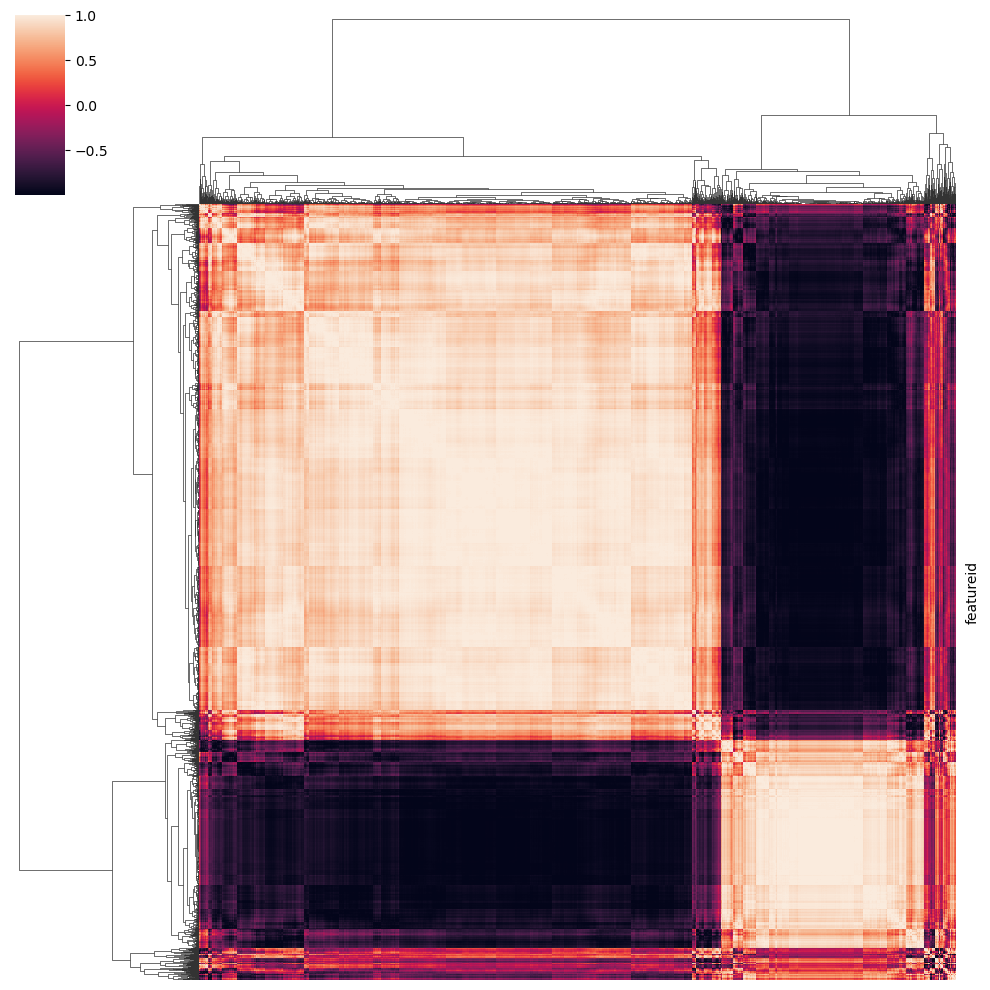

In [35]:
sns.clustermap(correlation_table_df,
               yticklabels=False,
               xticklabels=False)

plt.show()

In [5]:
named_metab = pd.read_csv('../data/Metabolome/info_feature_complete_filter.csv', index_col=0)
nmetab = named_metab.dropna(subset='Compound_Name')
nmetab.shape

(1542, 5)

In [57]:
correlation_table_df.head(2)

1111       737      1075      1061     21042     19936  \
featureid                                                               
1111       1.000000 -0.980674 -0.982213  0.991484  0.998452  0.829127   
737       -0.980674  1.000000  0.999322 -0.997117 -0.980715 -0.922387   

              20411      4573       528       443  ...  G900094885  \
featureid                                          ...               
1111       0.976976 -0.979880 -0.980586  0.833502  ...    0.966519   
737       -0.977888  0.999931  0.999917 -0.818272  ...   -0.928282   

           G900100685  G900104665  G900104675  G900148495  G900227605  \
featureid                                                               
1111         0.915403    0.877166    0.937306    0.917534   -0.712170   
737         -0.837251   -0.770898   -0.888737   -0.832112    0.826842   

           G900459405  G900604355  G902363445  G902706605  
featureid                                                  
1111         0.869409    0.838069    0.740275    0.714363  
737         -0.945905   -0.928017   -0.597515   -0.832440  

[2 rows x 5246 columns]

In [60]:
correlation_table_df.columns

Index(['1111', '737', '1075', '1061', '21042', '19936', '20411', '4573', '528',
       '443',
       ...
       'G900094885', 'G900100685', 'G900104665', 'G900104675', 'G900148495',
       'G900227605', 'G900459405', 'G900604355', 'G902363445', 'G902706605'],
      dtype='object', length=5246)

In [6]:
corr_df = correlation_table_df.loc[:, correlation_table_df.columns.isin(list(nmetab.index.astype(str)))]
corrdf = corr_df.filter(regex='^G', axis=0)
corrdf.shape

(145, 652)

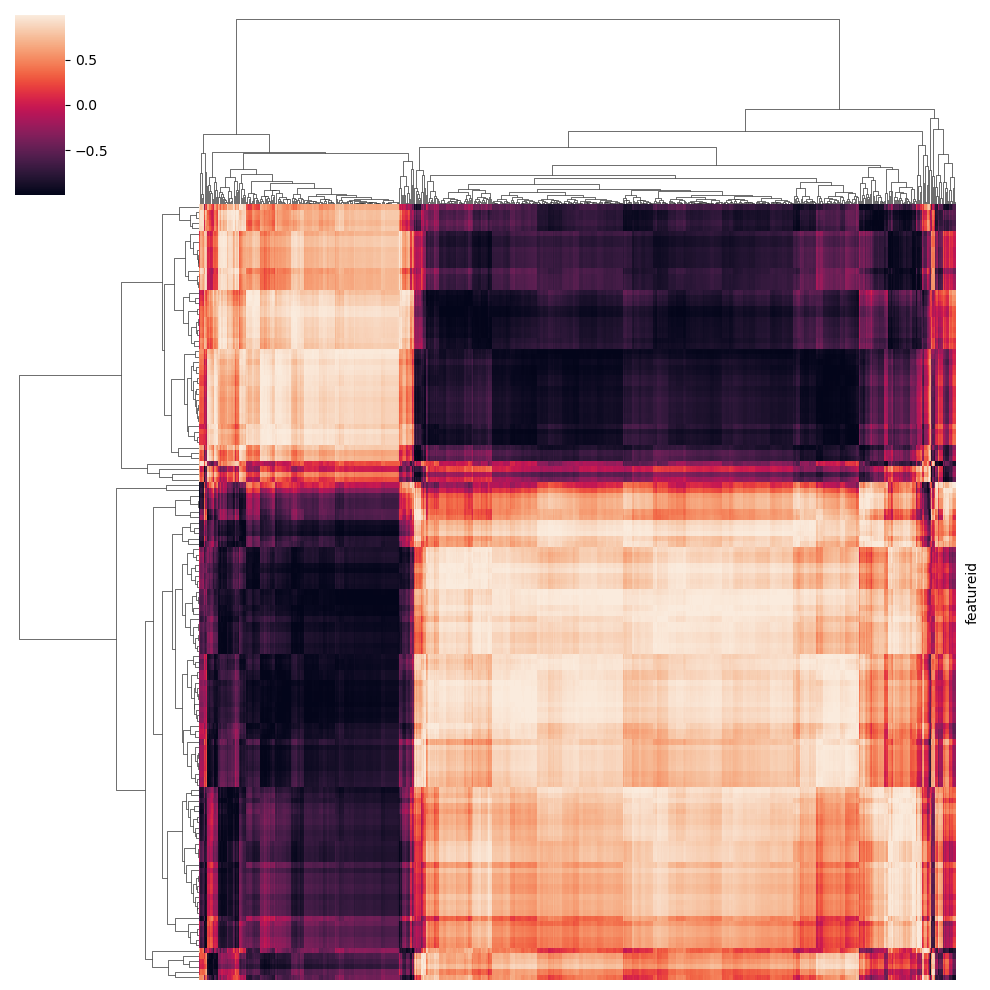

In [65]:
sns.clustermap(corrdf,
               yticklabels=False,
               xticklabels=False)

plt.show()

In [73]:
micro_feat = pd.read_csv('../data/Metabolome/jrpca_30d_Axis1_tb20features_micro.tsv', 
                         sep='\t', index_col=0)
micro_feat.head()

Log_Ratio_Classification
Feature ID                         
G001807575              Denominator
G001887245              Denominator
G000741525              Denominator
G000799115              Denominator
G000741705              Denominator

In [99]:
metab_feat = pd.read_csv('../data/Metabolome/jrpca_30d_Axis1_tb100features_metab.tsv', 
                         sep='\t', index_col=0)
metab_feat.head()

Log_Ratio_Classification
Feature ID                         
843                     Denominator
23495                   Denominator
585                     Denominator
412                     Denominator
498                     Denominator

In [100]:
metab_feat.shape

(200, 1)

In [101]:
corrdf2 = corrdf.loc[list(micro_feat.index.values)].copy()
corrdf3 = corrdf2.loc[:, corrdf2.columns.isin(list(metab_feat.index.astype(str)))].copy()
corrdf3.shape

(40, 26)

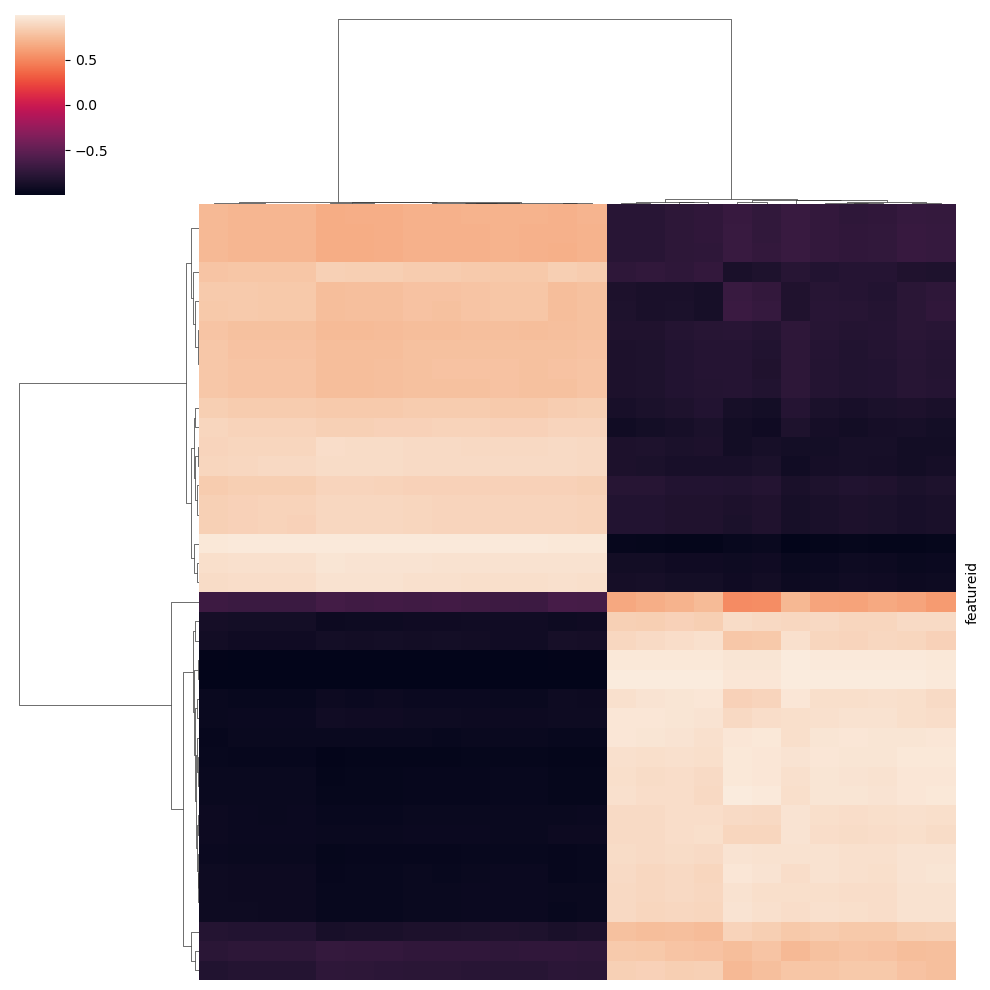

In [102]:
sns.clustermap(corrdf3,
               yticklabels=False,
               xticklabels=False)

plt.show()

In [112]:
abdf = corrdf3.T.copy()
abdf.index = abdf.index.astype(str)
cddf = nmetab[['Compound_Name']].copy()
cddf.index = cddf.index.astype(str)

nshort_corr = pd.merge(abdf, cddf, 
                       left_index=True, right_index=True)
nshort_corr.head()

G001807575  G001887245  G000741525  G000799115  G000741705  G900094885  \
663     0.939010    0.974171    0.855946    0.968497    0.932593    0.898511   
296    -0.924964   -0.957690   -0.921666   -0.921622   -0.975109   -0.952494   
518    -0.948369   -0.961213   -0.886994   -0.950199   -0.948613   -0.924374   
4600   -0.954369   -0.952301   -0.896778   -0.941924   -0.951242   -0.932173   
748    -0.940665   -0.951817   -0.917290   -0.926441   -0.967585   -0.948992   

      G002259605  G003315635  G000737845  G001578805  ...  G000367205  \
663     0.942836    0.908032    0.905934    0.938988  ...   -0.908841   
296    -0.981781   -0.945743   -0.934802   -0.974898  ...    0.875022   
518    -0.960465   -0.934562   -0.931472   -0.949223  ...    0.882867   
4600   -0.964662   -0.945065   -0.942544   -0.948829  ...    0.867698   
748    -0.977785   -0.951551   -0.944296   -0.964959  ...    0.865143   

      G001042635  G000741785  G012932365  G000741695  G001042695  G000304215  \
663    -0.756731   -0.814957   -0.814784   -0.884999   -0.844783   -0.967925   
296     0.845277    0.879870    0.881187    0.938576    0.911668    0.983399   
518     0.791304    0.852918    0.852677    0.914508    0.878028    0.982560   
4600    0.800536    0.867614    0.867118    0.924874    0.889171    0.987944   
748     0.832521    0.883049    0.883505    0.939036    0.908936    0.988773   

      G000165905  G001025175  \
663    -0.851192   -0.835732   
296     0.905862    0.759683   
518     0.885332    0.819786   
4600    0.898775    0.817520   
748     0.910524    0.782590   

                                          Compound_Name  
663       Spectral Match to Isonicotinamide from NIST14  
296                                ISOLEUCINE - 20.0 eV  
518      Candidate Cadaverine-C2:0 (delta mass:42.0104)  
4600  Spectral Match to Ethanol, 2-(2-butoxyethoxy)-...  
748                            Phenylalanine - 40.00 eV  

[5 rows x 41 columns]

In [113]:
nshort_corr.set_index('Compound_Name', inplace=True)

In [13]:
taxonomy = pd.read_csv('../data/Microbiome/sepsis_taxonomy/taxonomy.tsv', sep='\t', index_col=0)
taxonomy.head()

Taxon  Confidence
Feature ID                                                               
G001044175  d__Bacteria; p__Actinomycetota; c__Actinomycet...         1.0
G900095795  d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...         1.0
G001898465  d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...         1.0
G001450355  d__Bacteria; p__Pseudomonadota; c__Gammaproteo...         1.0
G001639275  d__Archaea; p__Methanobacteriota_A_1229; c__Me...         1.0

In [120]:
nshort = pd.merge(nshort_corr.T, taxonomy[['Taxon']], left_index=True, right_index=True)
nshort.set_index('Taxon', inplace=True)
nshort.head(2)

Spectral Match to Isonicotinamide from NIST14  \
Taxon                                                                                               
d__Bacteria; p__Actinomycetota; c__Actinomycete...                                       0.939010   
d__Bacteria; p__Actinomycetota; c__Actinomycete...                                       0.974171   

                                                    ISOLEUCINE - 20.0 eV  \
Taxon                                                                      
d__Bacteria; p__Actinomycetota; c__Actinomycete...             -0.924964   
d__Bacteria; p__Actinomycetota; c__Actinomycete...             -0.957690   

                                                    Candidate Cadaverine-C2:0 (delta mass:42.0104)  \
Taxon                                                                                                
d__Bacteria; p__Actinomycetota; c__Actinomycete...                                       -0.948369   
d__Bacteria; p__Actinomycetota; c__Actinomycete...                                       -0.961213   

                                                    Spectral Match to Ethanol, 2-(2-butoxyethoxy)- from NIST14  \
Taxon                                                                                                            
d__Bacteria; p__Actinomycetota; c__Actinomycete...                                          -0.954369            
d__Bacteria; p__Actinomycetota; c__Actinomycete...                                          -0.952301            

                                                    Phenylalanine - 40.00 eV  \
Taxon                                                                          
d__Bacteria; p__Actinomycetota; c__Actinomycete...                 -0.940665   
d__Bacteria; p__Actinomycetota; c__Actinomycete...                 -0.951817   

                                                    Phenylalanine - 40.00 eV  \
Taxon                                                                          
d__Bacteria; p__Actinomycetota; c__Actinomycete...                 -0.938039   
d__Bacteria; p__Actinomycetota; c__Actinomycete...                 -0.953929   

                                                    Spectral Match to Ethanol, 2-(2-butoxyethoxy)- from NIST14 [IIN-based on: CCMSLIB00003135965]  \
Taxon                                                                                                                                               
d__Bacteria; p__Actinomycetota; c__Actinomycete...                                          -0.955213                                               
d__Bacteria; p__Actinomycetota; c__Actinomycete...                                          -0.952223                                               

                                                    4-HYDROXY-2-QUINOLINECARBOXYLIC ACID - 30.0 eV  \
Taxon                                                                                                
d__Bacteria; p__Actinomycetota; c__Actinomycete...                                        0.961813   
d__Bacteria; p__Actinomycetota; c__Actinomycete...                                        0.955206   

                                                    Spectral Match to N-Acetyl-D-glucosamine from NIST14  \
Taxon                                                                                                      
d__Bacteria; p__Actinomycetota; c__Actinomycete...                                          -0.944011      
d__Bacteria; p__Actinomycetota; c__Actinomycete...                                          -0.952638      

                                                    Spectral Match to N-Acetyl-D-glucosamine from NIST14  \
Taxon                                                                                                      
d__Bacteria; p__Actinomycetota; c__Actinomycete...                                          -0.937416      
d__Bacteria; p__Actinomycetota; c__Actinomycete...                     

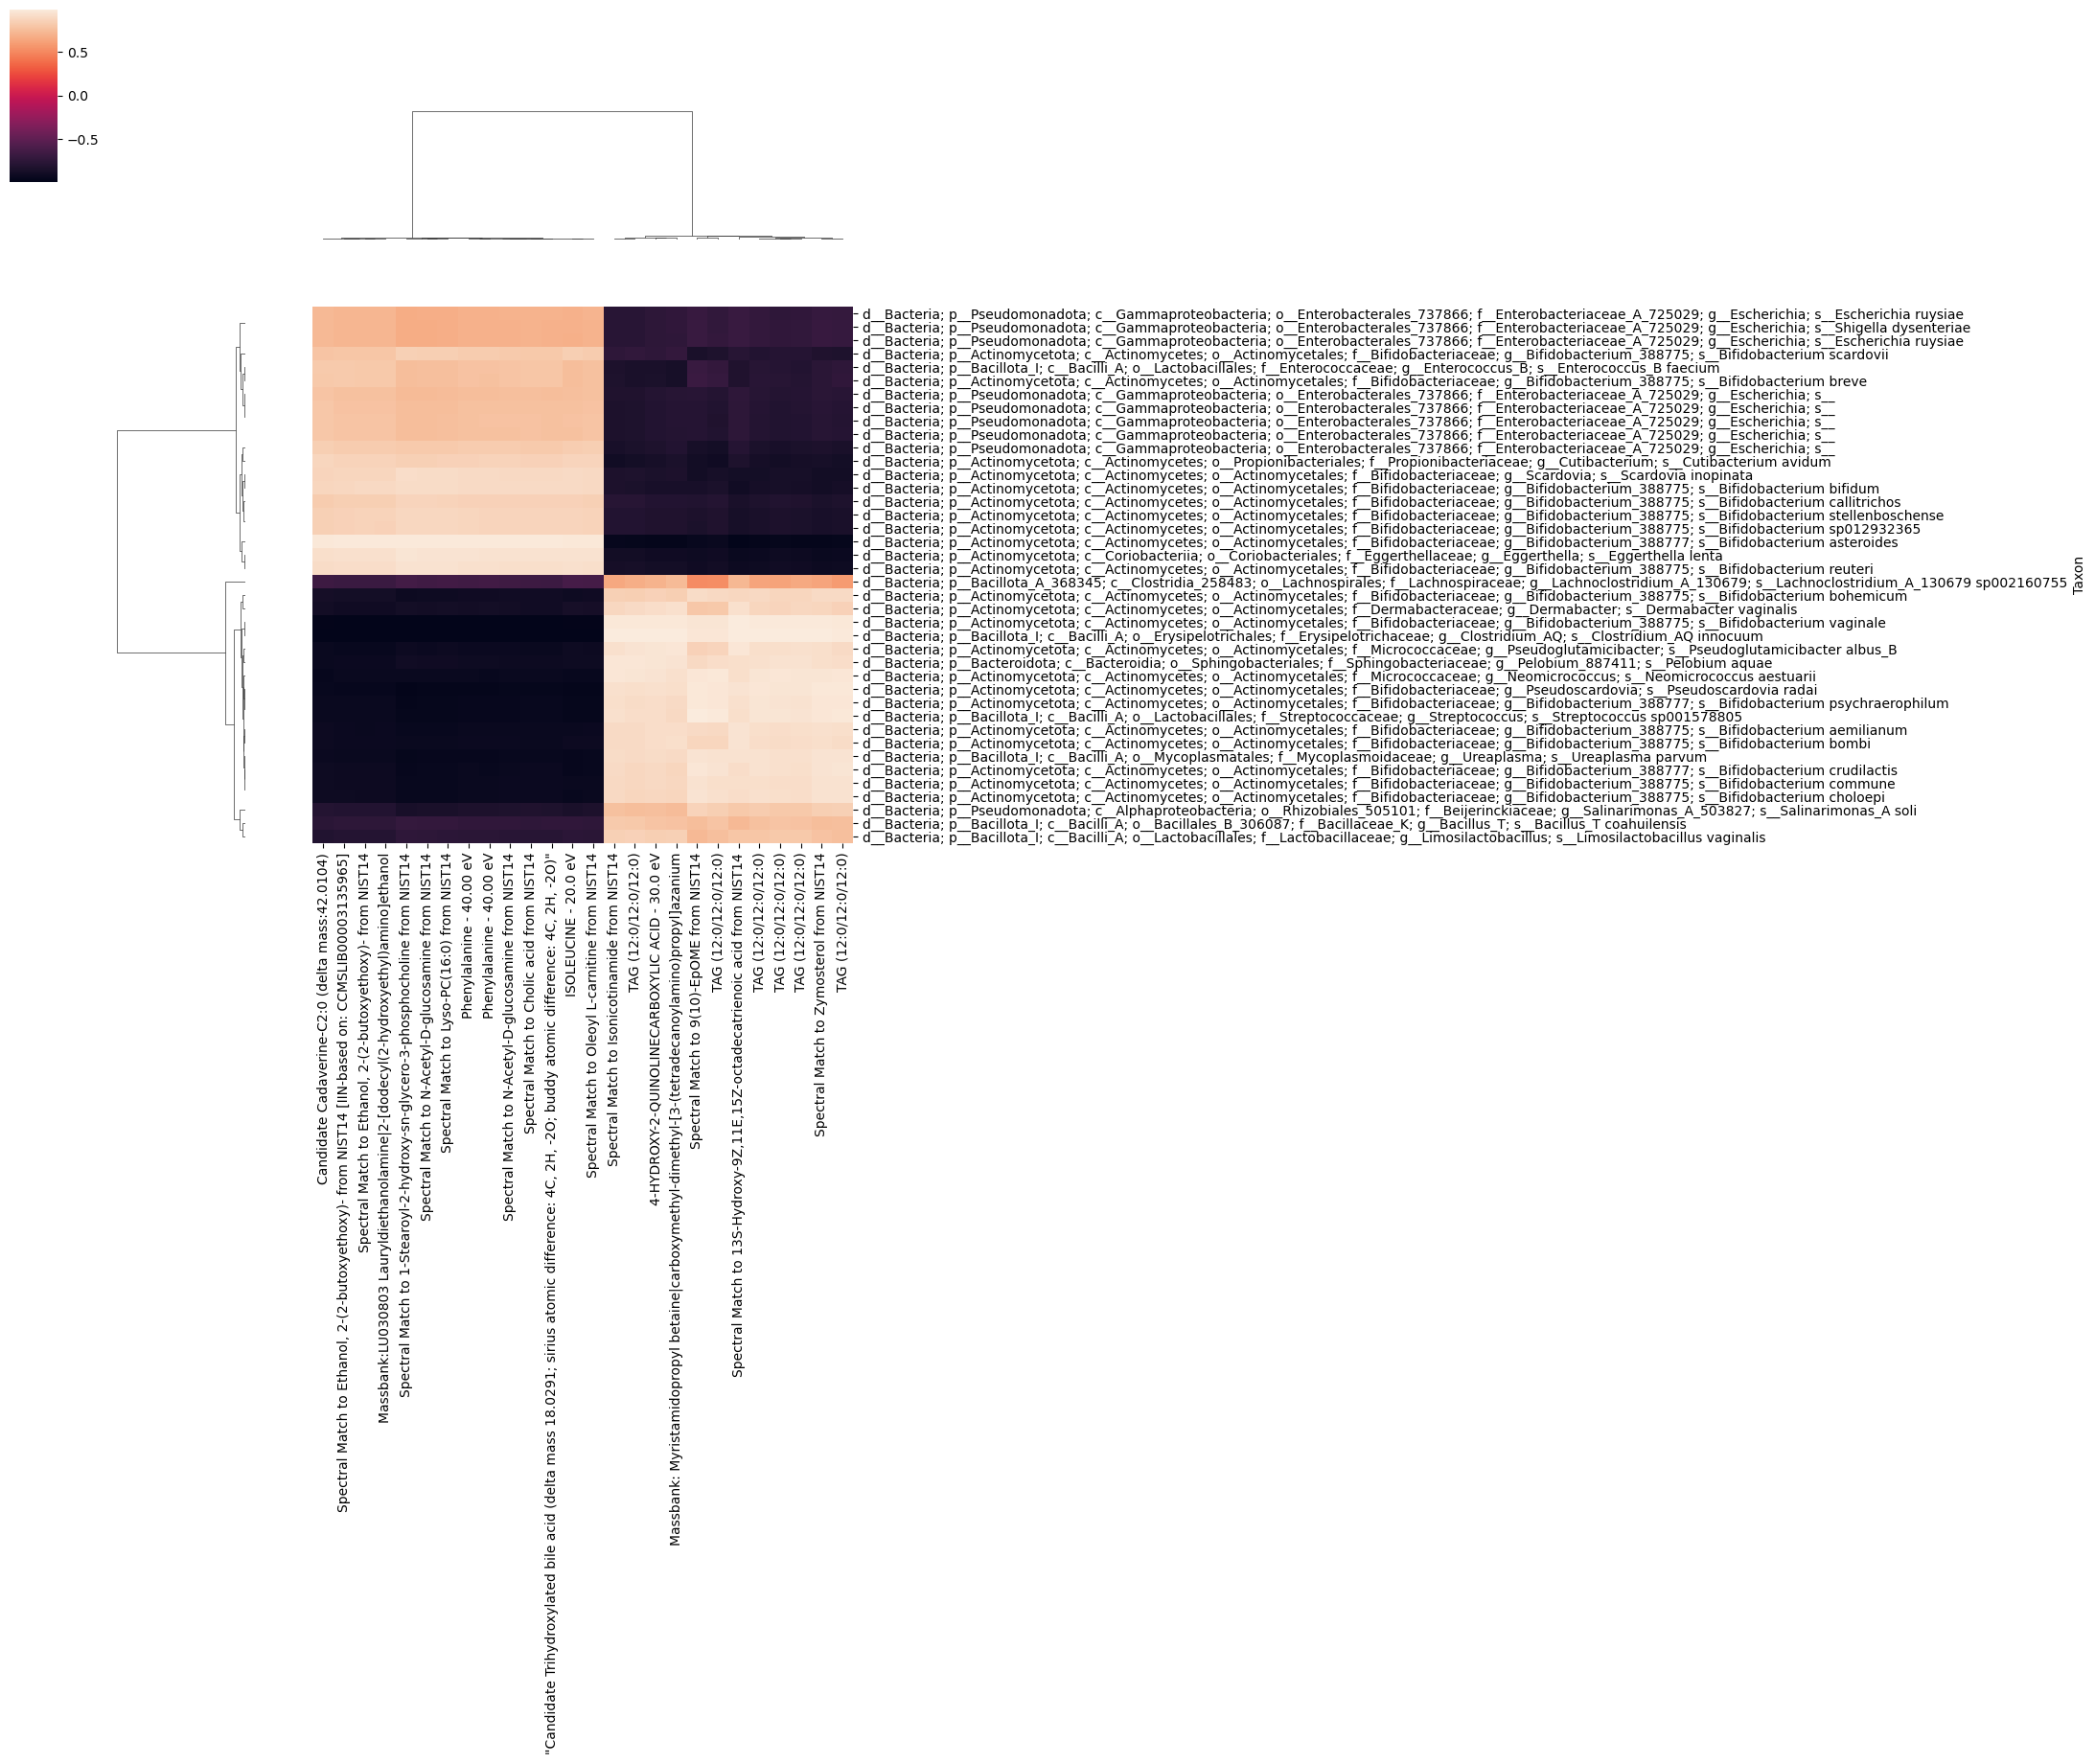

In [125]:
sns.clustermap(nshort,
               yticklabels=True,
               xticklabels=True)
plt.savefig('../figures/jrpca_short_named_corr_clustermap.png', dpi=150, bbox_inches='tight')
plt.show()

In [121]:
nshort.to_csv('../data/Metabolome/filt_jrpca_corr_table.csv')

# Acylcarnitines, Bacteroides, Clostridium

In [12]:
acarn = nmetab[nmetab['Compound_Name'].str.contains('carnitine')].copy()
acarn

mz        RT  Corr_ID  \
Feature                                  
274      204.123176  0.246218      NaN   
968      204.123201  0.346617      NaN   
998      218.138948  0.384704      NaN   
1425     232.154566  0.716355      NaN   
1135     232.154568  0.650917      NaN   
2936     246.170160  1.733757      NaN   
2792     246.170167  1.656964      NaN   
2204     246.170174  1.320723      NaN   
2655     246.170183  1.604978      NaN   
2505     246.170191  1.525786      NaN   
2356     246.170199  1.406251      NaN   
7573     288.217086  3.283969      NaN   
1539     290.159950  0.611651      NaN   
401      290.160007  0.353843      NaN   
13185    400.342458  5.205580      NaN   
13548    426.358009  5.320011      NaN   
14296    428.373657  5.643231      NaN   
12804    448.342157  5.033066      NaN   

                                             Compound_Name  Adduct  
Feature                                                             
274      Spectral Match to Acetyl-DL-carnitine from NIST14     M+H  
968                             Acetylcarnitine - 40.00 eV     M+H  
998                          Propionylcarnitine - 30.00 eV     M+H  
1425                           Butyrylcarnitine - 30.00 eV     M+H  
1135                           Butyrylcarnitine - 30.00 eV     M+H  
2936                                    pentanoylcarnitine    [M]+  
2792                                    pentanoylcarnitine    [M]+  
2204                        Isovalerylcarnitine - 30.00 eV     M+H  
2655                                    pentanoylcarnitine    [M]+  
2505                        Isovalerylcarnitine - 30.00 eV     M+H  
2356                        Isovalerylcarnitine - 30.00 eV     M+H  
7573                          Octanoylcarnitine - 40.00 eV     M+H  
1539                                    O-adipoylcarnitine  [M+H]+  
401                            O-3-methylglutarylcarnitine  [M+H]+  
13185     Spectral Match to Palmitoylcarnitine from NIST14     M+H  
13548     Spectral Match to Oleoyl L-carnitine from NIST14     M+H  
14296    Massbank:RP025602 Stearoyl-L-Carnitine|stearoy...     M+H  
12804                              O-arachidonoylcarnitine  [M+H]+

In [20]:
acarn.shape

(18, 5)

In [15]:
bact_clost_bifido = taxonomy[taxonomy['Taxon'].str.contains("Bacteroides|Clostridium|Bifidobacterium")].copy()
bact_clost_bifido

Taxon  Confidence
Feature ID                                                               
G007896885  d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...         1.0
G000007625  d__Bacteria; p__Bacillota_A_368345; c__Clostri...         1.0
G000450985  d__Bacteria; p__Bacillota_I; c__Bacilli_A; o__...         1.0
G000741525  d__Bacteria; p__Actinomycetota; c__Actinomycet...         1.0
G000340885  d__Bacteria; p__Bacillota_A_368345; c__Clostri...         1.0
...                                                       ...         ...
G900129365  d__Bacteria; p__Bacillota_A_368345; c__Clostri...         1.0
G000447315  d__Bacteria; p__Bacillota_A_368345; c__Clostri...         1.0
G900217165  d__Bacteria; p__Bacillota_A_368345; c__Clostri...         1.0
G000499785  d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...         1.0
G000741175  d__Bacteria; p__Actinomycetota; c__Actinomycet...         1.0

[125 rows x 2 columns]

In [42]:
bact_clost_bifido['genus'] = bact_clost_bifido.Taxon.str.split(";").str[5]
bact_clost_bifido

Taxon  Confidence  \
Feature ID                                                                  
G007896885  d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...         1.0   
G000007625  d__Bacteria; p__Bacillota_A_368345; c__Clostri...         1.0   
G000450985  d__Bacteria; p__Bacillota_I; c__Bacilli_A; o__...         1.0   
G000741525  d__Bacteria; p__Actinomycetota; c__Actinomycet...         1.0   
G000340885  d__Bacteria; p__Bacillota_A_368345; c__Clostri...         1.0   
...                                                       ...         ...   
G900129365  d__Bacteria; p__Bacillota_A_368345; c__Clostri...         1.0   
G000447315  d__Bacteria; p__Bacillota_A_368345; c__Clostri...         1.0   
G900217165  d__Bacteria; p__Bacillota_A_368345; c__Clostri...         1.0   
G000499785  d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...         1.0   
G000741175  d__Bacteria; p__Actinomycetota; c__Actinomycet...         1.0   

                                 genus  
Feature ID                              
G007896885     g__Bacteroides_H_857956  
G000007625            g__Clostridium_G  
G000450985           g__Clostridium_AQ  
G000741525   g__Bifidobacterium_388775  
G000340885            g__Clostridium_T  
...                                ...  
G900129365           g__Clostridium_AH  
G000447315            g__Clostridium_J  
G900217165            g__Clostridium_X  
G000499785     g__Bacteroides_H_857956  
G000741175   g__Bifidobacterium_388775  

[125 rows x 3 columns]

In [19]:
abc_df = correlation_table_df.loc[:, correlation_table_df.columns.isin(list(acarn.index.astype(str)))]
abcdf = abc_df.T.loc[:, abc_df.T.columns.isin(list(bact_clost_bifido.index.astype(str)))]
abcdf.shape

(16, 26)

In [21]:
abcdf

featureid  G000022965  G000025205  G000159155  G000165905  G000304215  \
274         -0.941156   -0.961517   -0.951646    0.994766    0.955688   
968         -0.898558   -0.984969   -0.975651    0.980203    0.974915   
998         -0.923012   -0.939636   -0.883066    0.967959    0.885346   
1425        -0.053511   -0.079634    0.173367    0.035021   -0.185151   
1135         0.516709    0.724967    0.852756   -0.653097   -0.846876   
2936         0.617640    0.674734    0.843541   -0.695541   -0.850342   
2792         0.230584    0.301449    0.524547   -0.303049   -0.530215   
2204         0.678830    0.907681    0.963971   -0.823126   -0.954767   
2655         0.581615    0.731899    0.871376   -0.696316   -0.870358   
2505         0.687177    0.864683    0.954106   -0.812852   -0.949831   
2356         0.685989    0.906303    0.965753   -0.827163   -0.957308   
7573        -0.887724   -0.986771   -0.982486    0.975244    0.981020   
13185       -0.781458   -0.969812   -0.992756    0.907976    0.985609   
13548       -0.770913   -0.966905   -0.990990    0.900540    0.983299   
14296       -0.794335   -0.983443   -0.990649    0.919769    0.982888   
12804        0.839169    0.930838    0.995086   -0.929909   -0.996622   

featureid  G000737845  G000737865  G000738005  G000741175  G000741285  ...  \
274         -0.971725   -0.854764   -0.961553    0.986715   -0.758013  ...   
968         -0.968946   -0.909926   -0.982572    0.960929   -0.692375  ...   
998         -0.911062   -0.779040   -0.948067    0.974196   -0.717155  ...   
1425         0.144110    0.210226   -0.123287    0.103233    0.118346  ...   
1135         0.767762    0.900105    0.694377   -0.576157    0.402797  ...   
2936         0.813617    0.826127    0.642247   -0.632037    0.580929  ...   
2792         0.470303    0.564046    0.259284   -0.224513    0.288606  ...   
2204         0.886277    0.990031    0.888800   -0.762030    0.483958  ...   
2655         0.808844    0.890348    0.701269   -0.625492    0.490243  ...   
2505         0.891517    0.964160    0.841796   -0.750972    0.534539  ...   
2356         0.891084    0.988133    0.887165   -0.766570    0.495717  ...   
7573        -0.969845   -0.923823   -0.983042    0.952420   -0.680534  ...   
13185       -0.938572   -0.985903   -0.958169    0.862702   -0.567498  ...   
13548       -0.933389   -0.988534   -0.954796    0.853701   -0.555929  ...   
14296       -0.938890   -0.980107   -0.974537    0.878814   -0.568391  ...   
12804        0.973679    0.950030    0.915330   -0.888927    0.684743  ...   

featureid  G000800475  G001025175  G001042635  G001263395  G001406695  \
274         -0.998490    0.582754    0.947526   -0.987175   -0.914300   
968         -0.990566    0.628490    0.940551   -0.961494   -0.949305   
998         -0.971326    0.416988    0.984454   -0.989258   -0.831523   
1425        -0.038069   -0.752774    0.374158   -0.182026    0.249842   
1135         0.675017   -0.959975   -0.464345    0.535345    0.900615   
2936         0.702222   -0.993587   -0.432288    0.577791    0.879120   
2792         0.310391   -0.939367    0.006529    0.154469    0.594036   
2204         0.847507   -0.853971   -0.721600    0.743100    0.986250   
2655         0.712442   -0.976348   -0.482701    0.580714    0.912246   
2505         0.831989   -0.910864   -0.661895    0.721566    0.979154   
2356         0.850685   -0.859502   -0.720199    0.746615    0.987540   
7573        -0.986867    0.651411    0.930591   -0.951476   -0.959870   
13185       -0.928458    0.767853    0.841160   -0.853782   -0.995097   
13548       -0.921779    0.773071    0.833524   -0.844473   -0.995157   
14296       -0.940370    0.726108    0.873345   -0.874766   -0.987736   
12804        0.940616   -0.833551   -0.795616    0.866735    0.994488   

featureid  G002259685  G003315635  G010667615  G012932365  G900094885  
274          0.995459   -0.987878   -0.981024    0.994138   -0.992520  
968          0.977025   -0.986393   -0.993022

In [27]:
abc_gname = pd.merge(abcdf.T, bact_clost_bifido[['Taxon']], 
                       left_index=True, right_index=True)
abc_gname.set_index('Taxon', inplace=True)
abc_gname.shape

(26, 16)

In [30]:
abc_gname.T.head()

Taxon  d__Bacteria; p__Actinomycetota; c__Actinomycetes; o__Actinomycetales; f__Bifidobacteriaceae; g__Bifidobacterium_388775; s__Bifidobacterium animalis  \
274                                            -0.941156                                                                                                     
968                                            -0.898558                                                                                                     
998                                            -0.923012                                                                                                     
1425                                           -0.053511                                                                                                     
1135                                            0.516709                                                                                                     

Taxon  d__Bacteria; p__Actinomycetota; c__Actinomycetes; o__Actinomycetales; f__Bifidobacteriaceae; g__Bifidobacterium_388775; s__Bifidobacterium swidsinskii  \
274                                            -0.961517                                                                                                        
968                                            -0.984969                                                                                                        
998                                            -0.939636                                                                                                        
1425                                           -0.079634                                                                                                        
1135                                            0.724967                                                                                                        

Taxon  d__Bacteria; p__Actinomycetota; c__Actinomycetes; o__Actinomycetales; f__Bifidobacteriaceae; g__Bifidobacterium_388775; s__Bifidobacterium vaginale  \
274                                            -0.951646                                                                                                     
968                                            -0.975651                                                                                                     
998                                            -0.883066                                                                                                     
1425                                            0.173367                                                                                                     
1135                                            0.852756                                                                                                     

Taxon  d__Bacteria; p__Actinomycetota; c__Actinomycetes; o__Actinomycetales; f__Bifidobacteriaceae; g__Bifidobacterium_388775; s__Bifidobacterium bifidum  \
274                                             0.994766                                                                                                    
968                                             0.980203                                                                                                    
998                                             0.967959                                                                                                    
1425                                            0.035021                                                                                                    
1135                                           -0.653097                                                                                                    

Taxon  d__Bacteria; p__Actinomycetota; c__Actinomycetes; o__Actinomycetales; f__Bifidobacteriaceae; g__Bifidobacterium_388777; s__Bifidobacterium asteroides  \
274                             

In [31]:
acarn[['Compound_Name']]

Compound_Name
Feature                                                   
274      Spectral Match to Acetyl-DL-carnitine from NIST14
968                             Acetylcarnitine - 40.00 eV
998                          Propionylcarnitine - 30.00 eV
1425                           Butyrylcarnitine - 30.00 eV
1135                           Butyrylcarnitine - 30.00 eV
2936                                    pentanoylcarnitine
2792                                    pentanoylcarnitine
2204                        Isovalerylcarnitine - 30.00 eV
2655                                    pentanoylcarnitine
2505                        Isovalerylcarnitine - 30.00 eV
2356                        Isovalerylcarnitine - 30.00 eV
7573                          Octanoylcarnitine - 40.00 eV
1539                                    O-adipoylcarnitine
401                            O-3-methylglutarylcarnitine
13185     Spectral Match to Palmitoylcarnitine from NIST14
13548     Spectral Match to Oleoyl L-carnitine from NIST14
14296    Massbank:RP025602 Stearoyl-L-Carnitine|stearoy...
12804                              O-arachidonoylcarnitine

In [38]:
abc_rename = abc_gname.T.copy()
abc_rename.index = abc_rename.index.astype(str)
label = acarn[['Compound_Name']].copy()
label.index = label.index.astype(str)

abc_mname = pd.merge(abc_rename, label,
                       left_index=True, right_index=True)
abc_mname.set_index('Compound_Name', inplace=True)

abc_mname.shape

(16, 26)

In [41]:
abc_mname.to_csv('../data/Metabolome/jointRPCA_carnitines_BifidoBacteroidClost.csv')

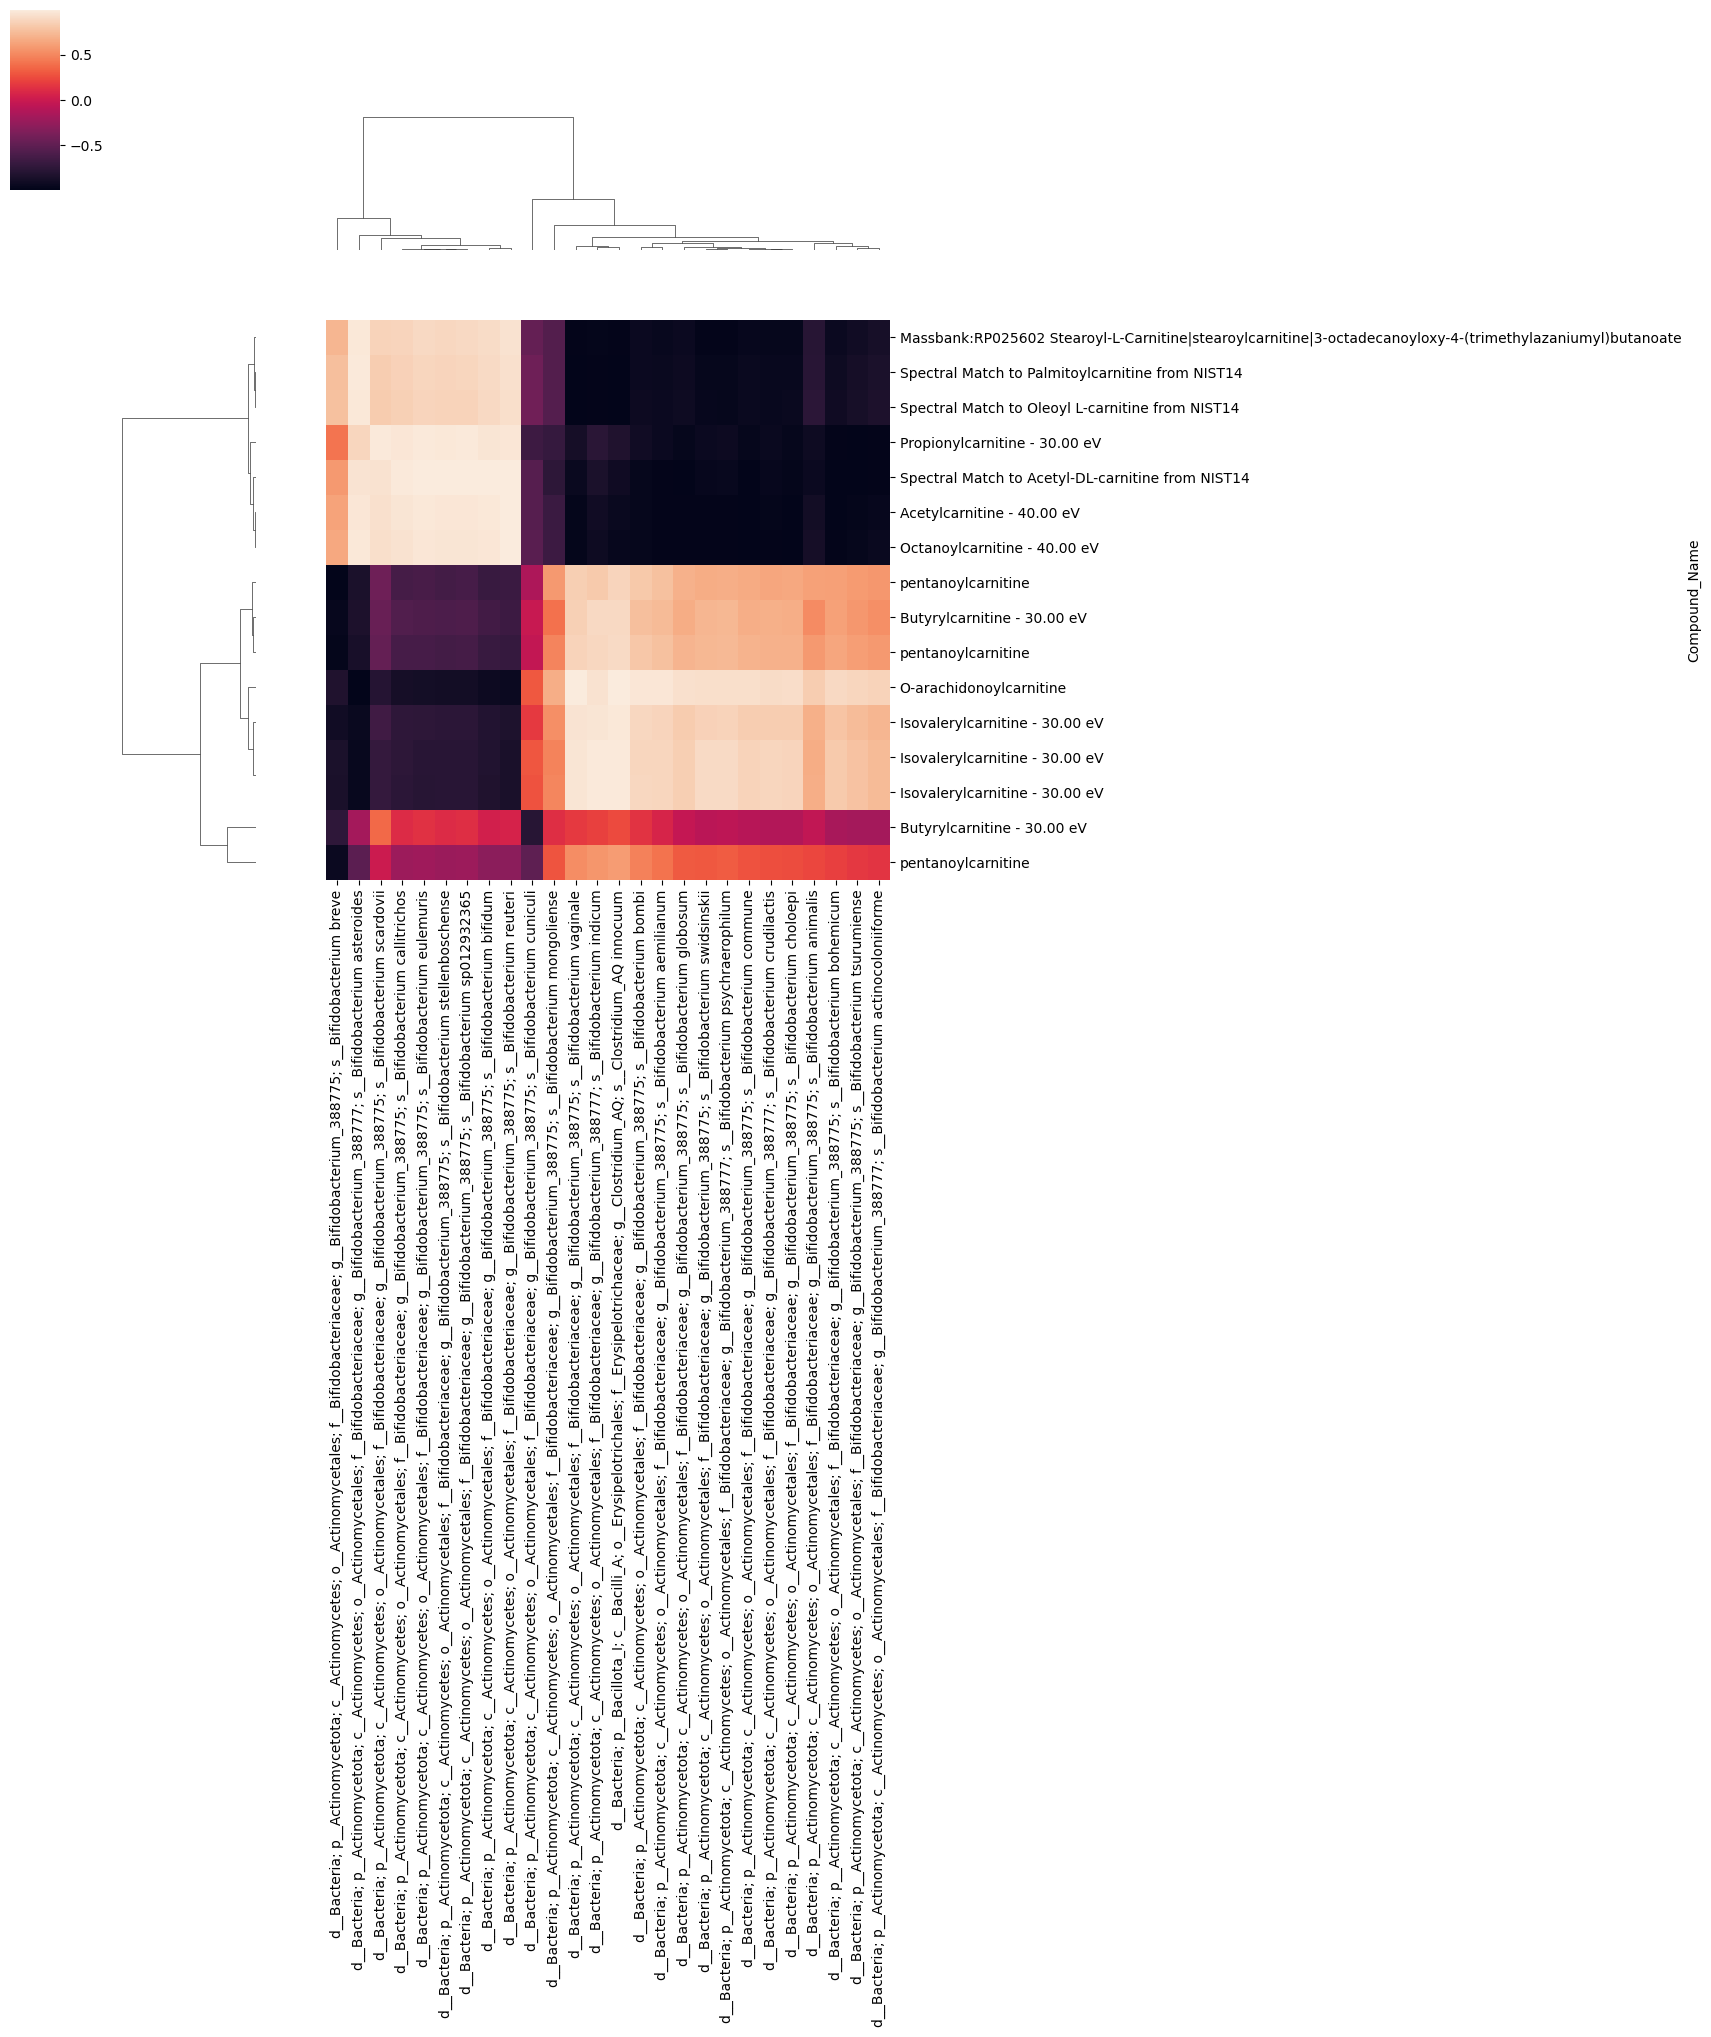

In [40]:
sns.clustermap(abc_mname,
               yticklabels=True,
               xticklabels=True)
plt.savefig('../figures/jrpca_abc_named_corr_clustermap.png', dpi=150, bbox_inches='tight')
plt.show()